## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [ ]:
Lecture-03-Decorator-and-Dynamic-practice.ipynb
ass_house_price.py

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

When time is : 0, get best_k: 12.596070879559406 best_b: -86.80013989248582, and the loss is: 30.17872966736562
When time is : 100, get best_k: 12.65891722343293 best_b: -86.79013989248548, and the loss is: 29.775983890926597
When time is : 200, get best_k: 12.721763567306454 best_b: -86.78013989248515, and the loss is: 29.373238114487574
When time is : 300, get best_k: 12.784609911179977 best_b: -86.77013989248482, and the loss is: 28.97049233804858
When time is : 400, get best_k: 12.847456255053501 best_b: -86.76013989248449, and the loss is: 28.56774656160952
When time is : 500, get best_k: 12.910302598927025 best_b: -86.75013989248416, and the loss is: 28.16500078517047
When time is : 600, get best_k: 12.973148942800549 best_b: -86.74013989248382, and the loss is: 27.76225500873143
When time is : 700, get best_k: 13.035995286674073 best_b: -86.73013989248349, and the loss is: 27.359509232292396
When time is : 800, get best_k: 13.098841630547597 best_b: -86.72013989248316, and the l

When time is : 7400, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 7500, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 7600, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 7700, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 7800, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 7900, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 8000, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 8100, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 8200, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the l

When time is : 14700, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 14800, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 14900, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 15000, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 15100, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 15200, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 15300, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 15400, get best_k: 16.271325069282312 best_b: -86.2153398924664, and the loss is: 8.184997760890635
When time is : 15500, get best_k: 16.271325069282312 best_b: -86.2153398924664, 

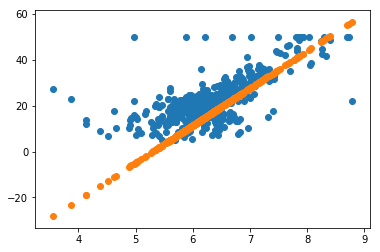

In [4]:
#ass_house_price2.py

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

data = load_boston()
X, Y = data['data'], data['target']


def draw_rm_and_price(X, Y):
    plt.scatter(X[:, 5], Y)  # 房屋数量x 与 价格y
    # plt.show()


def price(rm, k, b):
    return k * rm + b


def loss_absolute(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(y, y_hat)) / len(y)

#draw_rm_and_price(X, Y)


def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += x_i
    if y_i > y_hat_i:
        return -1 / n * gradient
    else:
        return 1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += 1
    if y_i > y_hat_i:
        return -1 / n * gradient
    else:
        return 1 / n * gradient


def gradient_get_kb():
    X_rm = X[:, 5]
    trying_times = 20000
    min_loss = float('inf')
    current_k = random.random() * 200 - 100
    current_b = random.random() * 50 - 100
    learning_rate = 1e-04

    for i in range(trying_times):
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss_absolute(Y, price_by_k_and_b)
        if i % 100 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b,
                                                                                                      current_loss))
        k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
        b_gradient = partial_b(X_rm, Y, price_by_k_and_b)
        current_k = current_k + (-1 * k_gradient) * learning_rate
        current_b = current_b + (-1 * b_gradient) * learning_rate

    price_by_final_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    draw_rm_and_price(X, Y)
    plt.scatter(X_rm, price_by_final_k_and_b)
    #plt.show()


gradient_get_kb()

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [5]:
#ass_edit_distance.py

from functools import lru_cache

solution = {}


@lru_cache(maxsize=2 ** 10)
def edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)

    tail_s1 = string1[-1]
    tail_s2 = string2[-1]

    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]

    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)

    min_distance, operation = min(candidates, key=lambda x: x[0])

    solution[(string1, string2)] = operation

    return min_distance


def parse_solution(str1, str2):
    if len(str1) == 0 and len(str2) == 0:
        return ''
    temp_str = solution[(str1, str2)]
    temp_str1 = str1
    temp_str2 = str2
    if temp_str.find('ADD') > -1:
        temp_str2 = str2[:-1]
        temp_str += "  " + str1 + str2[-1]
    elif temp_str.find('DEL') > -1:
        temp_str1 = str1[:-1]
        temp_str += "  " + temp_str1
    elif temp_str.find('SUB') > -1:
        temp_str2 = str2[:-1]
        temp_str1 = str1[:-1]
        temp_str += "  " + str1[:-1] + str2[-1]
    else:
        temp_str2 = str2[:-1]
        temp_str1 = str1[:-1]
        temp_str += str1
    parse_solution(temp_str1, temp_str2)
    return parse_solution(temp_str1, temp_str2) + ' \n ' + temp_str

print(edit_distance('ABCDEG', 'ABCCEFH'))
print(solution)
print(parse_solution('ABCDEG', 'ABCCEFH'))


3
{('A', 'A'): '', ('A', 'AB'): 'ADD B', ('A', 'ABC'): 'ADD C', ('A', 'ABCC'): 'ADD C', ('A', 'ABCCE'): 'ADD E', ('A', 'ABCCEF'): 'ADD F', ('A', 'ABCCEFH'): 'ADD H', ('AB', 'A'): 'DEL B', ('AB', 'AB'): '', ('AB', 'ABC'): 'ADD C', ('AB', 'ABCC'): 'ADD C', ('AB', 'ABCCE'): 'ADD E', ('AB', 'ABCCEF'): 'ADD F', ('AB', 'ABCCEFH'): 'ADD H', ('ABC', 'A'): 'DEL C', ('ABC', 'AB'): 'DEL C', ('ABC', 'ABC'): '', ('ABC', 'ABCC'): 'ADD C', ('ABC', 'ABCCE'): 'ADD E', ('ABC', 'ABCCEF'): 'ADD F', ('ABC', 'ABCCEFH'): 'ADD H', ('ABCD', 'A'): 'DEL D', ('ABCD', 'AB'): 'DEL D', ('ABCD', 'ABC'): 'DEL D', ('ABCD', 'ABCC'): 'SUB D => C', ('ABCD', 'ABCCE'): 'ADD E', ('ABCD', 'ABCCEF'): 'ADD F', ('ABCD', 'ABCCEFH'): 'ADD H', ('ABCDE', 'A'): 'DEL E', ('ABCDE', 'AB'): 'DEL E', ('ABCDE', 'ABC'): 'DEL E', ('ABCDE', 'ABCC'): 'DEL E', ('ABCDE', 'ABCCE'): '', ('ABCDE', 'ABCCEF'): 'ADD F', ('ABCDE', 'ABCCEFH'): 'ADD H', ('ABCDEG', 'A'): 'DEL G', ('ABCDEG', 'AB'): 'DEL G', ('ABCDEG', 'ABC'): 'DEL G', ('ABCDEG', 'ABCC'): '

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: 因为函数复杂到一定程度时，不能够进行直接求解，只能向极值方向不断趋近。

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: 梯度是损失函数对某个参数的偏导数，下降是指向梯度的反方向，从而得到最小值。


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 通过梯度，每次都可以得到正确的方向，从而每次都可以向正确的方向前进。

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 通过数据，得出拟合函数和参数。

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

In [ ]:
 看了几篇文章，我觉得应该是这个吧。
每个阶段的最优状态是由之前所有阶段的状态的组合得到的->搜索；
每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到而不管之前这个状态是如何得到的->动态规划

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

In [ ]:
有一些问题，使用动态规划可以比较简单的解决，而使用机器学习拟合函数的话，会变得更加复杂。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

In [ ]:
找零钱，切割物品获得最大价值，最长公共子序列，矩阵乘法。

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
输入法错误字符校正，文献著录项识别，搜索引擎关键字错别字猜测

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

In [ ]:
动态规划的无后效性：如果某阶段状态给定后，则在这个阶段以后过程的发展不受这个阶段以前各段状态的影响。
最优子结构：每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到
重叠子问题：第一次计算的时候把结果记下来，当再次需要已计算过的结果时，直接使用。如果没有计算过，就再按照递推式计算

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

没有统一的标准模型，也没有构造模型的通用方法，甚至还没有判断一个问题能否构造动态规划模型的准则。这样就只能对每类问题进行具体分析，构造具体的模型。对于较复杂的问题在选择状态、决策、确定状态转移规律等方面需要丰富的想象力和灵活的技巧性，这就带来了应用上的局限性
用数值方法求解时存在维数灾（curse of dimensionality）。若一维状态变量有m个取值，那么对于n 维问题，状态就有m^n个值，对于每个状态值都要计算、存储函数

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

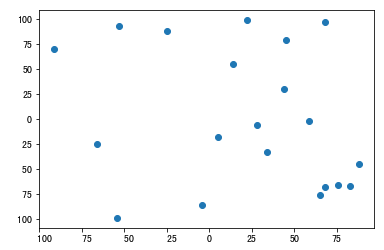

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

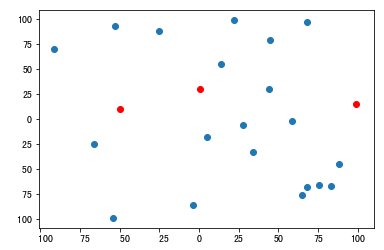

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro